In [41]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
(train_img, train_label), (test_img, test_label) = tf.keras.datasets.fashion_mnist.load_data()

In [43]:
print(test_img.shape)

(10000, 28, 28)


In [44]:
# data normalization
train_img = train_img / 255
test_img = test_img / 255

In [45]:
model = tf.keras.Sequential()
# flatten first
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [46]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
model.fit(train_img, train_label, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.4962 - acc: 0.8256
Epoch 2/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3772 - acc: 0.8652
Epoch 3/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3386 - acc: 0.8754
Epoch 4/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3155 - acc: 0.8855
Epoch 5/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2964 - acc: 0.8915


In [47]:
model.evaluate(test_img, test_label)

10000/10000 [==============================] - 1s 64us/sample - loss: 0.3646 - acc: 0.8693


[0.3646486676454544, 0.8693]

In [48]:
# now we use one_hot vector

In [49]:
train_label_onehot = tf.keras.utils.to_categorical(train_label)

In [50]:
train_label_onehot

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [51]:
test_label_onehot = tf.keras.utils.to_categorical(test_label)

In [52]:
model = tf.keras.Sequential()
# flatten first
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [53]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.fit(train_img, train_label_onehot, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.4994 - acc: 0.8236
Epoch 2/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3762 - acc: 0.8644
Epoch 3/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3382 - acc: 0.8771
Epoch 4/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3121 - acc: 0.8858
Epoch 5/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2960 - acc: 0.8907


In [54]:
predict = model.predict(test_img)

In [55]:
predict

array([[7.2562725e-06, 4.0316230e-08, 2.8610788e-07, ..., 1.0406842e-02,
        3.2077830e-06, 9.8526901e-01],
       [1.4435854e-04, 4.4150120e-10, 9.7463131e-01, ..., 5.6777006e-13,
        1.4405357e-07, 5.5617733e-12],
       [2.3562150e-06, 9.9999726e-01, 5.9310695e-10, ..., 6.2729824e-14,
        2.0480670e-09, 1.1070482e-11],
       ...,
       [3.1732060e-03, 1.7488388e-07, 3.3719960e-04, ..., 1.5947317e-06,
        9.9329668e-01, 6.0397340e-08],
       [3.0703197e-06, 9.9971825e-01, 1.1418009e-08, ..., 2.3918751e-09,
        6.4828974e-08, 5.5923604e-08],
       [2.3261072e-04, 9.3585840e-07, 4.1495805e-05, ..., 7.2171651e-03,
        3.8784673e-03, 4.2931923e-05]], dtype=float32)

In [56]:
np.argmax(predict[0])

9

In [57]:
# use optimizer that keras supply
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['acc'] )
model.fit(train_img, train_label_onehot, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.4859 - acc: 0.8256
Epoch 2/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.4294 - acc: 0.8440
Epoch 3/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.4112 - acc: 0.8522
Epoch 4/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.4006 - acc: 0.8558
Epoch 5/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3997 - acc: 0.8563


In [58]:
model = tf.keras.Sequential()
# flatten first
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [59]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['acc'] )

In [60]:
# add validation data
history = model.fit(train_img, train_label_onehot, epochs=5, validation_data=(test_img, test_label_onehot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.5782 - acc: 0.7944 - val_loss: 0.5285 - val_acc: 0.8154
Epoch 2/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.4755 - acc: 0.8335 - val_loss: 0.4974 - val_acc: 0.8184
Epoch 3/5
60000/60000 [==============================] - 6s 92us/sample - loss: 0.4506 - acc: 0.8438 - val_loss: 0.4975 - val_acc: 0.8312
Epoch 4/5
60000/60000 [==============================] - 6s 92us/sample - loss: 0.4325 - acc: 0.8492 - val_loss: 0.4845 - val_acc: 0.8395
Epoch 5/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.4213 - acc: 0.8546 - val_loss: 0.4464 - val_acc: 0.8479


In [61]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

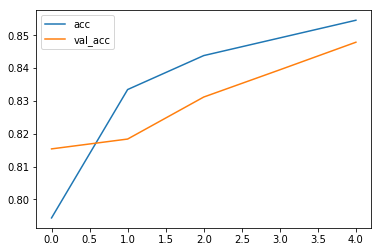

In [62]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
# show label on the picture
plt.legend()
# the picture show there may be overfitting(will be more clear if the epoch is set to a bigger number)

In [63]:
# drop out
model = tf.keras.Sequential()
# flatten first
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
# drop out 50% of the last layer
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation='relu'))
# drop out 50% of the last layer
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation='relu'))
# drop out 50% of the last layer
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [64]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)              

In [65]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['acc'] )
# add validation data
history = model.fit(train_img, train_label_onehot, epochs=10, validation_data=(test_img, test_label_onehot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 155us/sample - loss: 0.8838 - acc: 0.6733 - val_loss: 0.5234 - val_acc: 0.8145
Epoch 2/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.6233 - acc: 0.7795 - val_loss: 0.4762 - val_acc: 0.8366
Epoch 3/10
60000/60000 [==============================] - 9s 150us/sample - loss: 0.5763 - acc: 0.7992 - val_loss: 0.4685 - val_acc: 0.8295
Epoch 4/10
60000/60000 [==============================] - 9s 158us/sample - loss: 0.5498 - acc: 0.8072 - val_loss: 0.4459 - val_acc: 0.8403
Epoch 5/10
60000/60000 [==============================] - 9s 154us/sample - loss: 0.5296 - acc: 0.8166 - val_loss: 0.4353 - val_acc: 0.8385
Epoch 6/10
60000/60000 [==============================] - 9s 158us/sample - loss: 0.5221 - acc: 0.8184 - val_loss: 0.4301 - val_acc: 0.8451
Epoch 7/10
60000/60000 [==============================] - 9s 151us/sample - loss: 0.5118 - acc: 0.8203 - val_l

In [ ]:
# regularization, in fact, we merely use regularization
# model.add(tf.keras.layers.Dense(regularizaion=))